Reference from Herman Kamper's lectrure and Steve Brunton's lecture at University of Washington

In [ ]:
import numpy as np
import IPython.display as ipd
from scipy.io import wavfile
import librosa
import librosa.display
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams.update({"font.size": 16})

## **Generate wave with one frequency**

In [ ]:
fs = 16000  # sampling rate
t = np.arange(0, 2, 1 / fs)  # time
f0 = 600
x = np.cos(2 * np.pi * f0 * t)  # generate cosine with frequency of f0

In [ ]:
ipd.Audio(data=x, rate=fs)

In [ ]:
N = len(t)
X = np.fft.fft(x)
plt.plot(np.linspace(0, fs * (N - 1)/N, N), np.abs(X))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([0, fs / 2])
plt.show()

## **Generate Fourier transform from a recording**

In [50]:
fs, x = wavfile.read("C.wav")

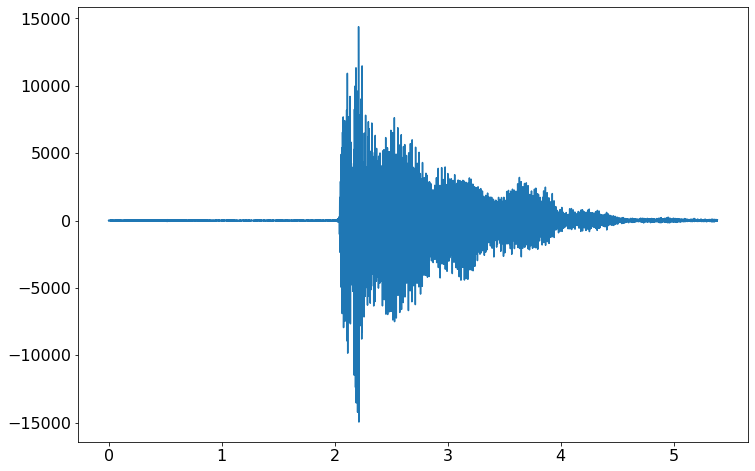

In [51]:
plt.plot(np.linspace(0, len(x) / fs, len(x)), x[:, 0])
plt.show()

(0.0, 1000.0)

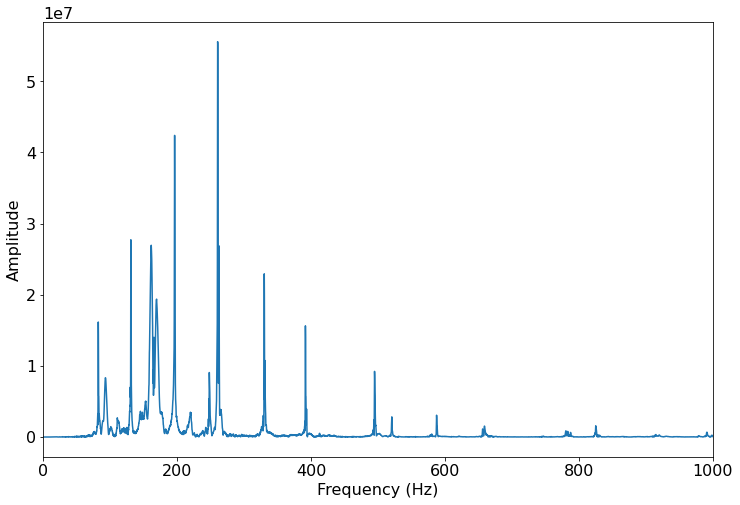

In [54]:
N = len(X)
w = np.hamming(len(x))
X = np.fft.fft(x[:, 0] * w)
plt.plot(np.linspace(0, fs * (N - 1)/N, N), np.abs(X))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([0, 1000])

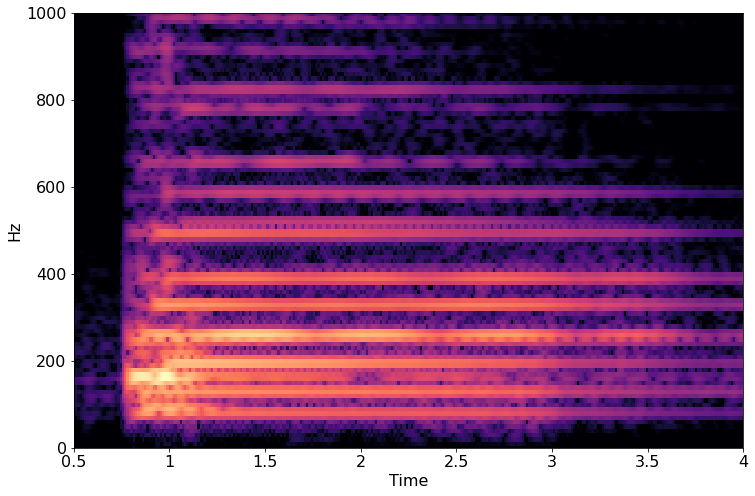

In [60]:
n_fft = fs * 0.1  # change this
hop_len = fs * 0.01
stft = librosa.stft(x[60000:, 0] / x.max(), n_fft=int(n_fft), hop_length=int(hop_len))
D = librosa.amplitude_to_db(stft, ref=np.max)
stft = np.abs(stft)
librosa.display.specshow(
    D, y_axis='linear', x_axis='time', sr=fs,
    fmax=1000  
)
plt.xlim([0.5, 4])
plt.ylim([0, 1000])
plt.show()

## **Generate churp signal**

In [39]:
fs = 1000
dt = 1 / fs
t = np.arange(0, 2, dt)

In [40]:
t1 = 2
f0 = 50
f1 = 200
x = np.cos(2 * np.pi * t * (f0 + (f1 - f0) * (t**2) / (3 * t1 ** 2) ) )

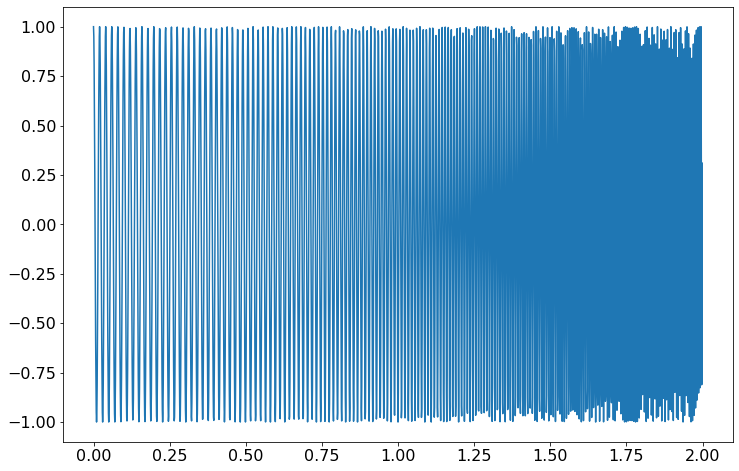

In [41]:
plt.plot(t, x)
plt.show()

(0.0, 500.0)

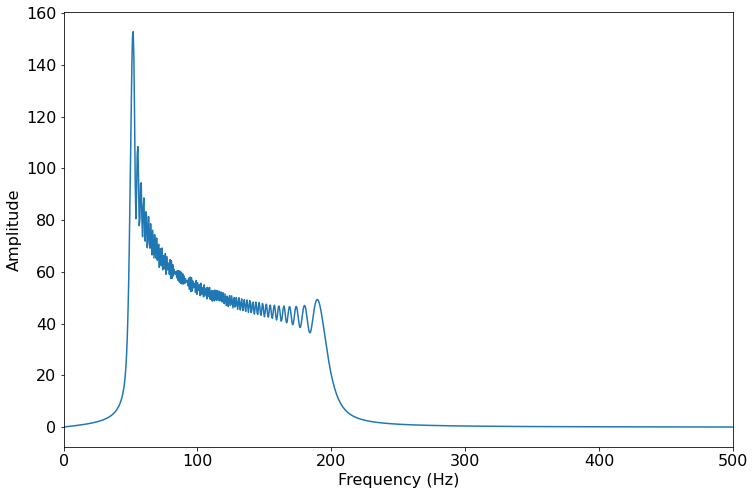

In [42]:
# w = np.hamming(len(x))
X = np.fft.fft(x)
N = len(X)
plt.plot(np.linspace(0, fs * (N - 1)/N, N), np.abs(X))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim([0, fs / 2])

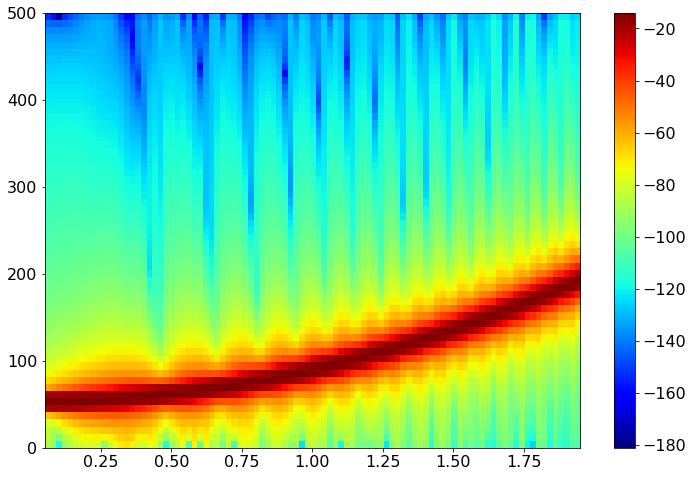

In [43]:
plt.specgram(x, NFFT=120, Fs=fs, noverlap=100, cmap="jet")
plt.colorbar()
plt.show()

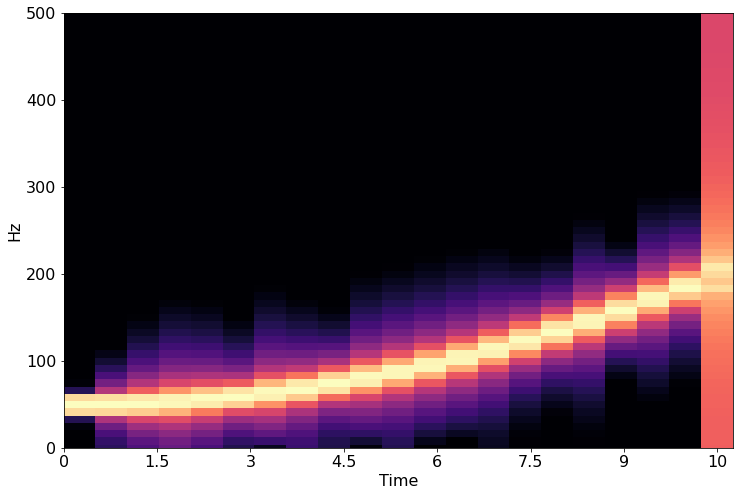

In [46]:
n_fft = 120
hop_len = 100
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_len)
D = librosa.amplitude_to_db(stft, ref=np.max)
stft = np.abs(stft)
librosa.display.specshow(
    D, y_axis='linear', x_axis='time', sr=fs
)